In [1]:
%reload_ext autoreload
%autoreload 2

from Grid import Grid, Point
from Engine import Engine

init_config = {'endothelial_cells': [Point(1,1)]}
grid = Grid(width=100, height=100, init_config=init_config)
engine = Engine(init_grid=grid, generations=36)
engine.run()

AttributeError: 'list' object has no attribute 'exec_cell_actions'

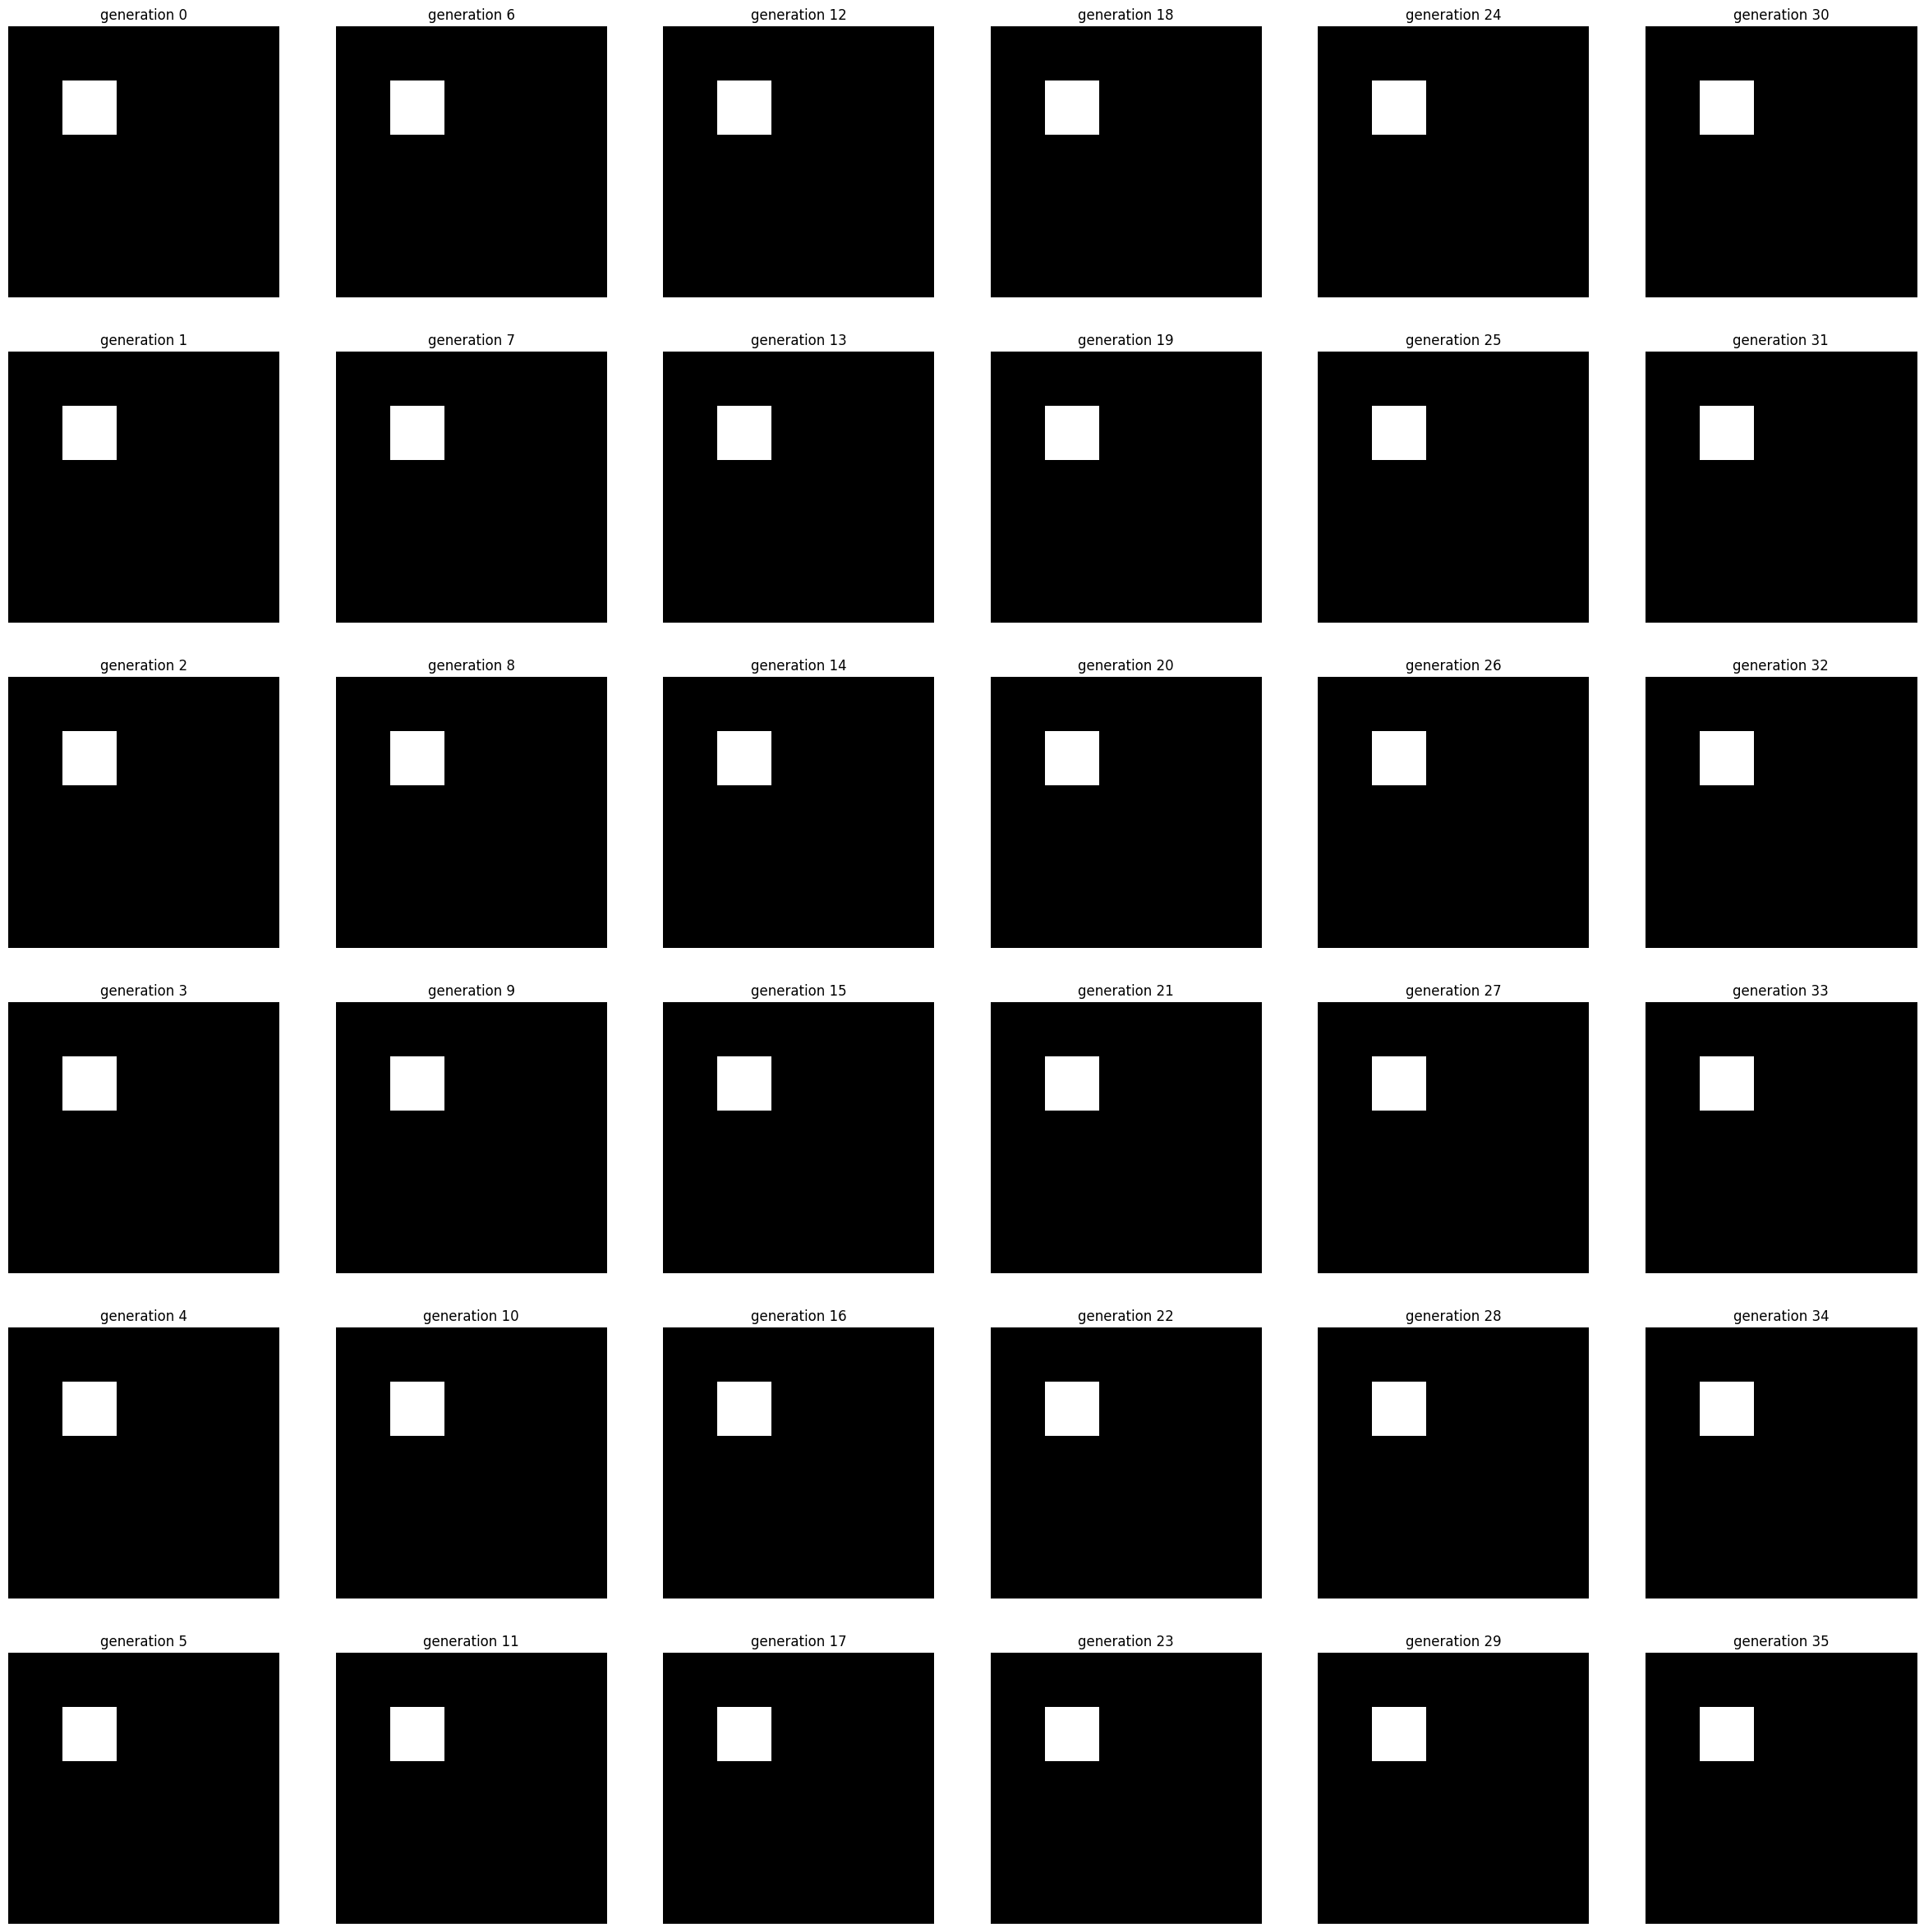

In [42]:
engine.visualize()